In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.2 MB/s eta 0:00:00


In [ ]:
df = yf.download('TSLA', start='2018-01-01', end='2021-12-31')
returns = df['Close'].pct_change().dropna()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


In [ ]:
print (df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


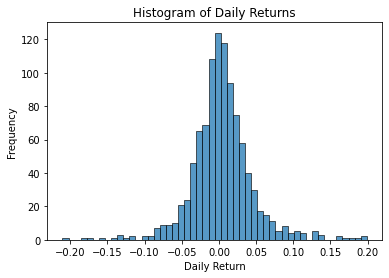

In [ ]:
sns.histplot(returns, bins=50)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
ticks = np.arange(-0.2, 0.21, 0.05)
plt.xticks(ticks)
plt.show()

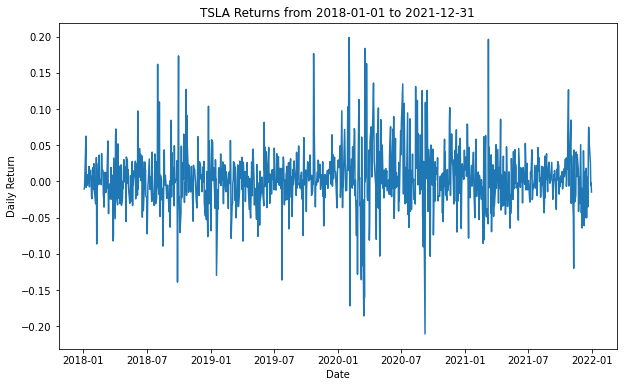

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns, linestyle='-')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.yticks(ticks)
plt.title('TSLA Returns from 2018-01-01 to 2021-12-31')
plt.show()

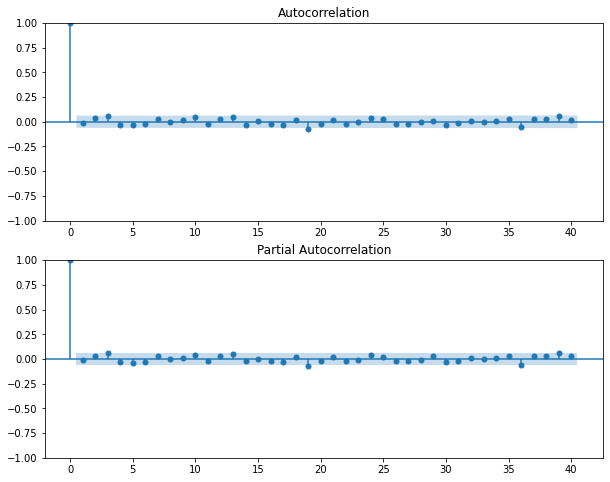

In [ ]:
# Compute ACF and PACF
acf = sm.tsa.stattools.acf(returns, nlags=40)
pacf = sm.tsa.stattools.pacf(returns, nlags=40)

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(returns, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(returns, lags=40, ax=ax[1],method='ywm')
plt.show()

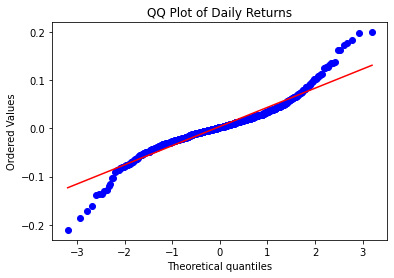

In [ ]:
from scipy.stats import probplot
probplot(returns, dist='norm', plot=plt)
plt.title('QQ Plot of Daily Returns')
plt.show()

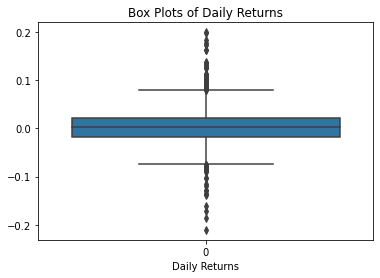

In [ ]:
sns.boxplot(returns)
plt.title('Box Plots of Daily Returns')
plt.xlabel('Daily Returns')
plt.show()

In [ ]:
volume = df['Volume'].dropna().drop(df.index[0])
y = returns
X = sm.add_constant(volume)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     15.28
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           9.87e-05
Time:                        08:08:49   Log-Likelihood:                 1793.3
No. Observations:                1006   AIC:                            -3583.
Df Residuals:                    1004   BIC:                            -3573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0039      0.002     -1.672      0.0

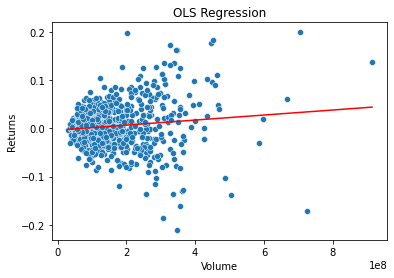

In [ ]:
sns.scatterplot(x=volume, y=returns)
sns.lineplot(x=volume, y=results.predict(), color='red')
plt.title('OLS Regression')
plt.xlabel('Volume')
plt.ylabel('Returns')
plt.show()